In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 와인 데이터를 불러옴
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로, 와인의 분류를 y로 저장함
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [3]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

score = model.evaluate(X_test, y_test)
score[1]

Epoch 1/50


8/8 [==============================] - 1s 36ms/step - loss: 29.6954 - accuracy: 0.2487 - val_loss: 24.5123 - val_accuracy: 0.2485
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 22.2057 - accuracy: 0.2487 - val_loss: 17.8519 - val_accuracy: 0.2485
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 16.0881 - accuracy: 0.2487 - val_loss: 13.0169 - val_accuracy: 0.2485
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 11.8753 - accuracy: 0.2487 - val_loss: 9.7934 - val_accuracy: 0.2485
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 9.2612 - accuracy: 0.2487 - val_loss: 8.1303 - val_accuracy: 0.2485
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 7.7827 - accuracy: 0.2487 - val_loss: 6.8877 - val_accuracy: 0.2485
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 6.5442 - accuracy: 0.2487 - val_loss: 5.6991 - val_accuracy: 0.2485
Epoch 8/50
8/8 [===================

0.9438461661338806

# 14-2

## 모델 업데이트 하면서 모델 학습 실행

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

filename = './data/model/{epoch:02d}-{val_accuracy:.4f}.hdf5'

# 학습 중에 모델 저장
checkpointer = ModelCheckpoint(filepath=filename, verbose=True)

history_2 = model.fit(X_train, y_train, epochs=50, batch_size=500,
                      validation_split=0.25, verbose=0, callbacks=[checkpointer])

score_2 = model.evaluate(X_test, y_test)
score[1]


Epoch 1: saving model to ./data/model\01-0.9446.hdf5

Epoch 2: saving model to ./data/model\02-0.9454.hdf5

Epoch 3: saving model to ./data/model\03-0.9469.hdf5

Epoch 4: saving model to ./data/model\04-0.9454.hdf5

Epoch 5: saving model to ./data/model\05-0.9485.hdf5

Epoch 6: saving model to ./data/model\06-0.9485.hdf5

Epoch 7: saving model to ./data/model\07-0.9492.hdf5

Epoch 8: saving model to ./data/model\08-0.9500.hdf5

Epoch 9: saving model to ./data/model\09-0.9500.hdf5

Epoch 10: saving model to ./data/model\10-0.9500.hdf5

Epoch 11: saving model to ./data/model\11-0.9508.hdf5

Epoch 12: saving model to ./data/model\12-0.9523.hdf5

Epoch 13: saving model to ./data/model\13-0.9508.hdf5

Epoch 14: saving model to ./data/model\14-0.9508.hdf5

Epoch 15: saving model to ./data/model\15-0.9492.hdf5

Epoch 16: saving model to ./data/model\16-0.9523.hdf5

Epoch 17: saving model to ./data/model\17-0.9546.hdf5

Epoch 18: saving model to ./data/model\18-0.9508.hdf5

Epoch 19: saving m

0.9438461661338806

# 3 그래프로 과적합 확인하기

In [7]:
history_3 = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                      validation_split=0.25, verbose=0)

In [8]:
hist_df = pd.DataFrame(history_3.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.105041,0.962792,0.108235,0.963077
1,0.104427,0.961765,0.107525,0.963846
2,0.105465,0.961252,0.106634,0.964615
3,0.105627,0.962022,0.109859,0.959231
4,0.103248,0.963562,0.105603,0.963846
...,...,...,...,...
1995,0.020578,0.994355,0.092257,0.980000
1996,0.022305,0.993328,0.075031,0.984615
1997,0.021290,0.993841,0.077565,0.986154
1998,0.019255,0.994611,0.076382,0.986154


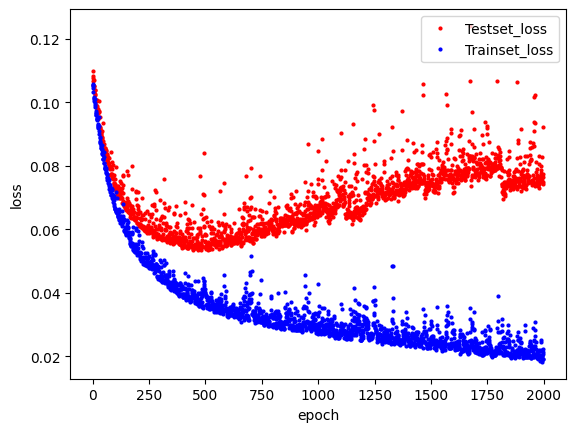

In [9]:
import numpy as np
import matplotlib.pyplot as plt
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c='red', markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c='blue', ms=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 4 학습의 자동 중단

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath = './data/model/Ch14-4-bestmodel.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=0, save_best_only=True)

In [11]:
history_stop = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                         validation_split=0.25, verbose=1, callbacks=[
                             early_stopping_callback, checkpointer
                         ])

Epoch 1/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.0189 - accuracy: 0.9954 - val_loss: 0.0762 - val_accuracy: 0.9838
Epoch 2/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0194 - accuracy: 0.9949 - val_loss: 0.0754 - val_accuracy: 0.9869
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.0795 - val_accuracy: 0.9846
Epoch 4/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0193 - accuracy: 0.9946 - val_loss: 0.0748 - val_accuracy: 0.9862
Epoch 5/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0194 - accuracy: 0.9951 - val_loss: 0.0764 - val_accuracy: 0.9854
Epoch 6/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0793 - val_accuracy: 0.9815
Epoch 7/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0260 - accuracy: 0.9913 - val_loss: 0.0738 - val_accuracy: 0.9869
Epoch 8/2000
8/